In [21]:
from pathlib import Path

import numpy as np
import arviz as az
import pymc as pm
import pandas as pd
import geopandas as gpd
import cufflinks as cf
import matplotlib.pyplot as plt
from libpysal.weights import Kernel
from pandas.plotting import scatter_matrix
from scipy.spatial import distance_matrix

cf.go_offline()
data_dir = Path('../data/processed')
data = gpd.read_file(data_dir / 'spatial_income_1880.gpkg')
data['is_old'] = data.is_old.astype(int)
# print(data.loc[data.orthodox_proportion.isna()])
data = data.dropna().reset_index()
# W = Kernel.from_dataframe(data, fixed=True, bandwidth=150, function='quartic')
xy = np.array([data.geometry.x, data.geometry.y]).T
d = distance_matrix(xy, xy)
d_norm = d / d.max()
n = data.shape[0]

array([[<AxesSubplot:xlabel='lutheran', ylabel='lutheran'>,
        <AxesSubplot:xlabel='orthodox', ylabel='lutheran'>,
        <AxesSubplot:xlabel='total_income', ylabel='lutheran'>],
       [<AxesSubplot:xlabel='lutheran', ylabel='orthodox'>,
        <AxesSubplot:xlabel='orthodox', ylabel='orthodox'>,
        <AxesSubplot:xlabel='total_income', ylabel='orthodox'>],
       [<AxesSubplot:xlabel='lutheran', ylabel='total_income'>,
        <AxesSubplot:xlabel='orthodox', ylabel='total_income'>,
        <AxesSubplot:xlabel='total_income', ylabel='total_income'>]],
      dtype=object)

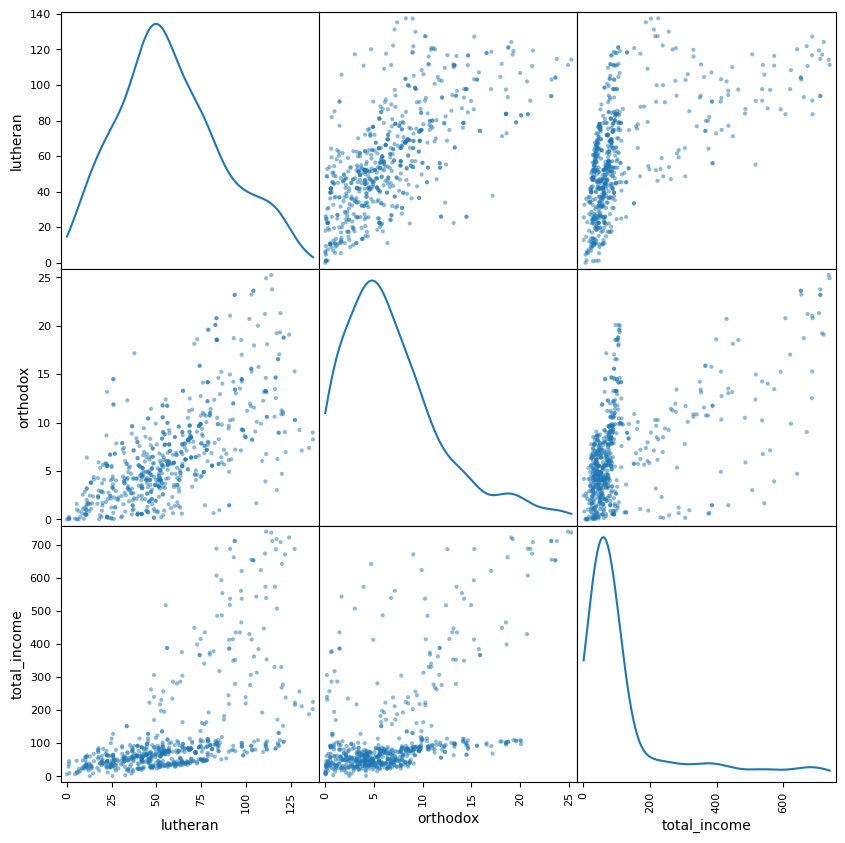

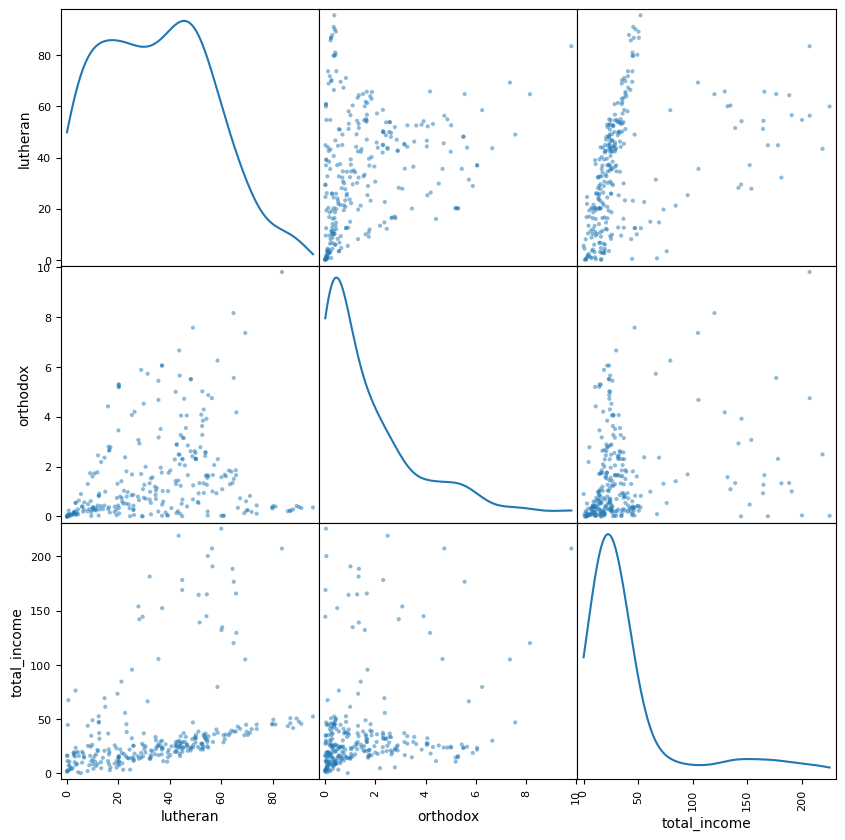

In [22]:
scatter_matrix(data.loc[data.is_old == 1, ['lutheran', 'orthodox', 'total_income']], diagonal='kde', figsize=(10, 10))
scatter_matrix(data.loc[data.is_old == 0, ['lutheran', 'orthodox', 'total_income']], diagonal='kde', figsize=(10, 10))

<AxesSubplot:>

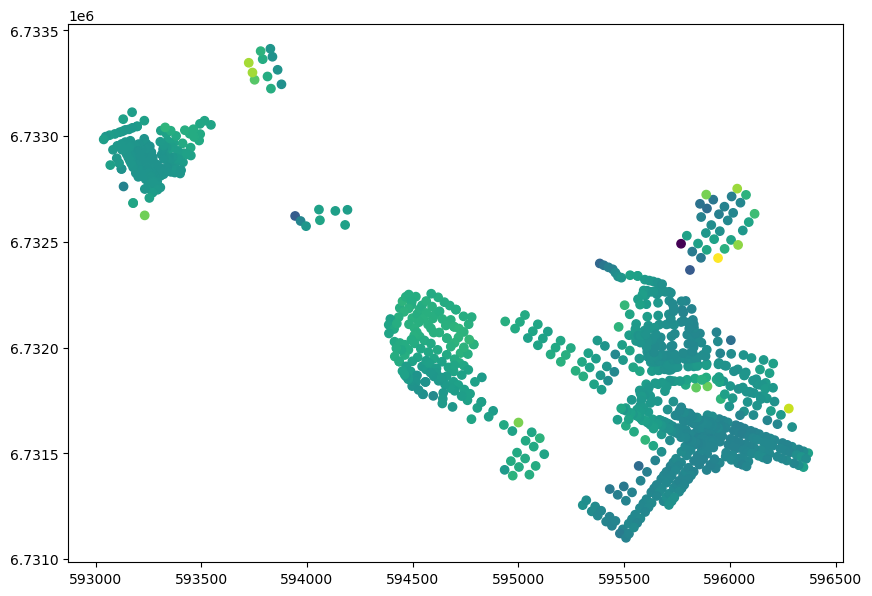

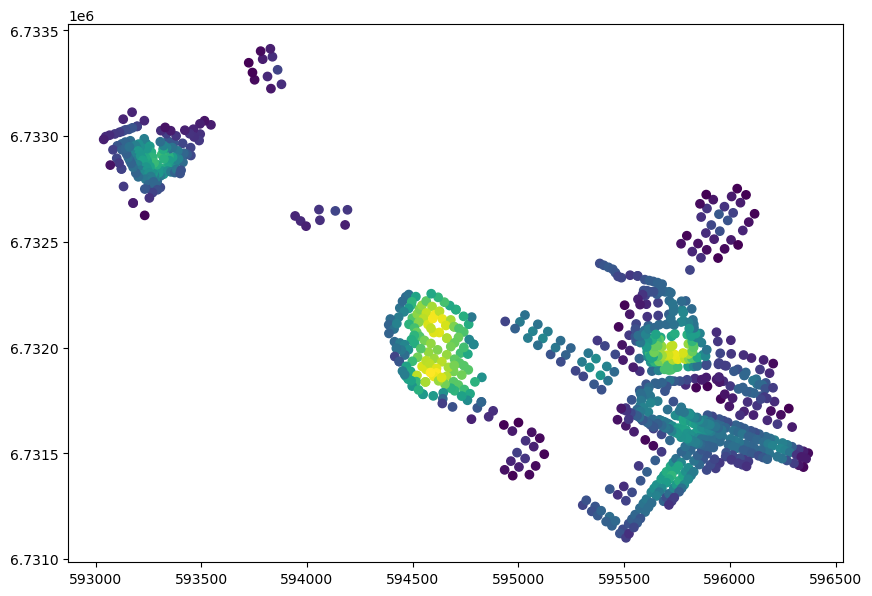

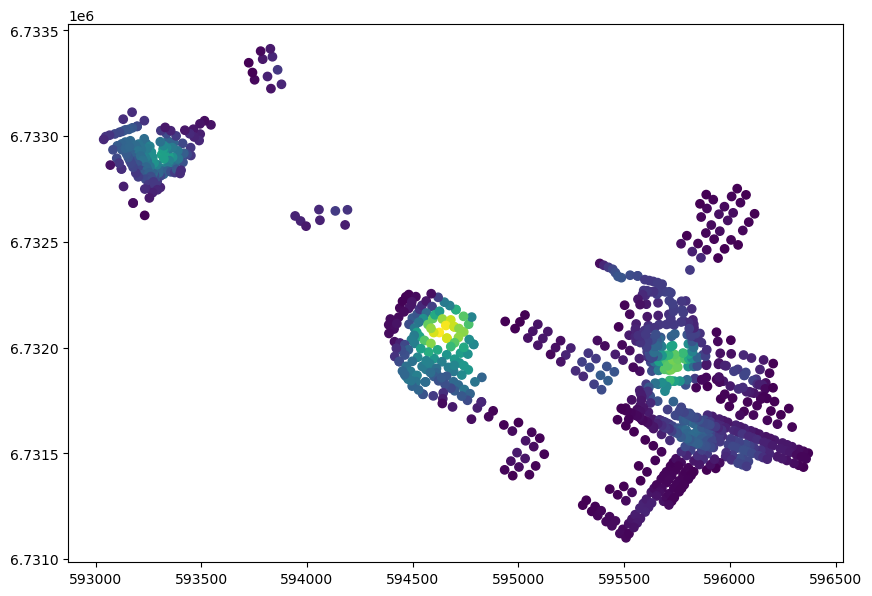

In [41]:
data.plot(column='income_per_capita_ln', figsize=(10,10))
data.plot(column='population', figsize=(10,10))
data.plot(column='orthodox', figsize=(10,10))

In [24]:
# data.loc[data.is_old,'income_per_capita'].hist(figsize=(15,10), bins=50)
# plt.show()
# data.loc[~data.is_old,'income_per_capita'].hist(figsize=(15,10), bins=50)
# data.hist(column='orthodox')
# data.hist(column='population')
# data.hist(column='orthodox_proportion', figsize=(15, 10), bins=40)
# data.hist(column='orthodox_proportion_ln', figsize=(15, 10), bins=40)
# data.hist(column='orthodox')
# data.hist(column='lutheran')
# data.iplot(x='total_income', y='total_density', kind='scatter', mode='markers')

In [25]:
# with pm.Model() as model_1:
#     F = pm.ConstantData('F', data.is_old.astype('int'))
#
#     mu_beta_W = np.array([4, 1])
#     sigma_beta_W = np.array(np.diagflat([1, 1]))
#     beta_W = pm.MvNormal('beta_W', mu_beta_W, sigma_beta_W, shape=2)
#     sigma_W = pm.HalfNormal('sigma_W', sigma=1)
#     ln_W = pm.StudentT('ln_W', nu=1, mu=beta_W[0] + beta_W[1] * F, sigma=sigma_W, observed=data.total_income_ln)
#
#     mu_beta_O = np.array([0., 0., 0.])
#     mu_beta_L = np.array([0., 0., 0.])
#     sigma_beta_O = np.array(np.diagflat([0.25, 0.25, 0.25]))
#     sigma_beta_L = np.array(np.diagflat([0.25, 0.25, 0.25]))
#
#     beta_O = pm.MvNormal('beta_O', mu_beta_O, sigma_beta_O, shape=3)
#     beta_L = pm.MvNormal('beta_L', mu_beta_L, sigma_beta_L, shape=3)
#     sigma_O = pm.HalfNormal('sigma_O', 10)
#     sigma_L = pm.HalfNormal('sigma_L', 10)
#
#     O = pm.Normal('O', beta_O[0] + beta_O[1] * F + beta_O[2] * ln_W, sigma_O, observed=data.orthodox)
#     L = pm.Normal('L', beta_L[0] + beta_L[1] * F + beta_L[2] * ln_W, sigma_L, observed=data.lutheran)
#
#     prior = pm.sample_prior_predictive()
#     posterior = pm.sample(init="adapt_diag", return_inferencedata=True)
#     posterior_prediction = pm.sample_posterior_predictive(posterior)
#
# az.plot_posterior(posterior)
# az.plot_trace(posterior)
# az.plot_forest(posterior, combined=False, hdi_prob=0.94)
# pm.model_to_graphviz(model_1)

In [26]:
# with pm.Model() as model_2:
#     F = pm.ConstantData('F', data.is_old.astype('int'))
#
#     mu_beta_W = np.array([4, 1])
#     sigma_beta_W = np.array(np.diagflat([1, 1]))
#     beta_W = pm.MvNormal('beta_W', mu_beta_W, sigma_beta_W, shape=2)
#     sigma_W = pm.HalfNormal('sigma_W', sigma=1)
#     ln_W = pm.StudentT('ln_W', nu=1, mu=beta_W[0] + beta_W[1] * F, sigma=sigma_W, observed=data.total_income_ln)
#
#     mu_beta_O_prop = np.array([0.1, 0.1, 0.1])
#     mu_beta_P = np.array([0., 0., 0.])
#     sigma_beta_O_prop = np.array(np.diagflat([0.1, 0.1, 0.1]))
#     sigma_beta_P = np.array(np.diagflat([0.25, 0.25, 0.25]))
#
#     beta_O_prop = pm.MvNormal('beta_O_prop', mu_beta_O_prop, sigma_beta_O_prop, shape=3)
#     beta_P = pm.MvNormal('beta_P', mu_beta_L, sigma_beta_L, shape=3)
#     sigma_O_prop = pm.HalfNormal('sigma_O_prop', 0.05)
#     sigma_P = pm.HalfNormal('sigma_P', 50)
#     P = pm.Normal('P', beta_P[0] + beta_P[1] * F + beta_P[2] * ln_W, sigma_P, observed=data.population)
#
#     mu_O_prop = beta_O_prop[0] + beta_O_prop[1] * F + beta_O_prop[2] * ln_W
#     O_prop = pm.TruncatedNormal('O_prop', mu=mu_O_prop, sigma=sigma_O_prop, lower=0, upper=1, observed=data.orthodox_proportion)
#
#     prior = pm.sample_prior_predictive()
#     posterior = pm.sample(init="adapt_diag", return_inferencedata=True)
#     posterior_prediction = pm.sample_posterior_predictive(posterior)
#
# az.plot_posterior(posterior)
# az.plot_trace(posterior)
# az.plot_forest(posterior, combined=False, hdi_prob=0.94)
# pm.model_to_graphviz(model_2)

In [27]:
with pm.Model() as model_1:
    W = pm.MutableData('W', data.total_income_ln)

    α_O = pm.Normal('α_O', 1.5, 0.1)
    β_O = pm.Normal('β_O', 0, 0.1)
    σ_O = pm.Gamma('σ_O', 2, 2)
    O = pm.Gamma('O', mu=pm.math.exp(α_O + β_O * W), sigma=σ_O, observed=data.orthodox)

    α_P = pm.Normal('α_P', 4, 0.1)
    β_P = pm.Normal('β_P', 0, 0.1)
    σ_P = pm.Gamma('σ_P', 10, 2)
    P = pm.Gamma('P', mu=pm.math.exp(α_P + β_P * W), sigma=σ_P, observed=data.population)

    prior_1 = pm.sample_prior_predictive()
    posterior_1 = pm.sample(init="adapt_diag", return_inferencedata=True)
    posterior_prediction_1 = pm.sample_posterior_predictive(posterior_1)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α_O, β_O, σ_O, α_P, β_P, σ_P]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 88 seconds.


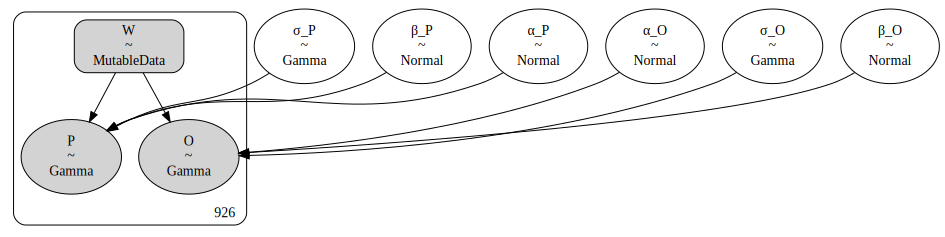

In [28]:
graph_1 = pm.model_to_graphviz(model_1)
graph_1

array([<AxesSubplot:xlabel='O / O'>, <AxesSubplot:xlabel='P / P'>],
      dtype=object)

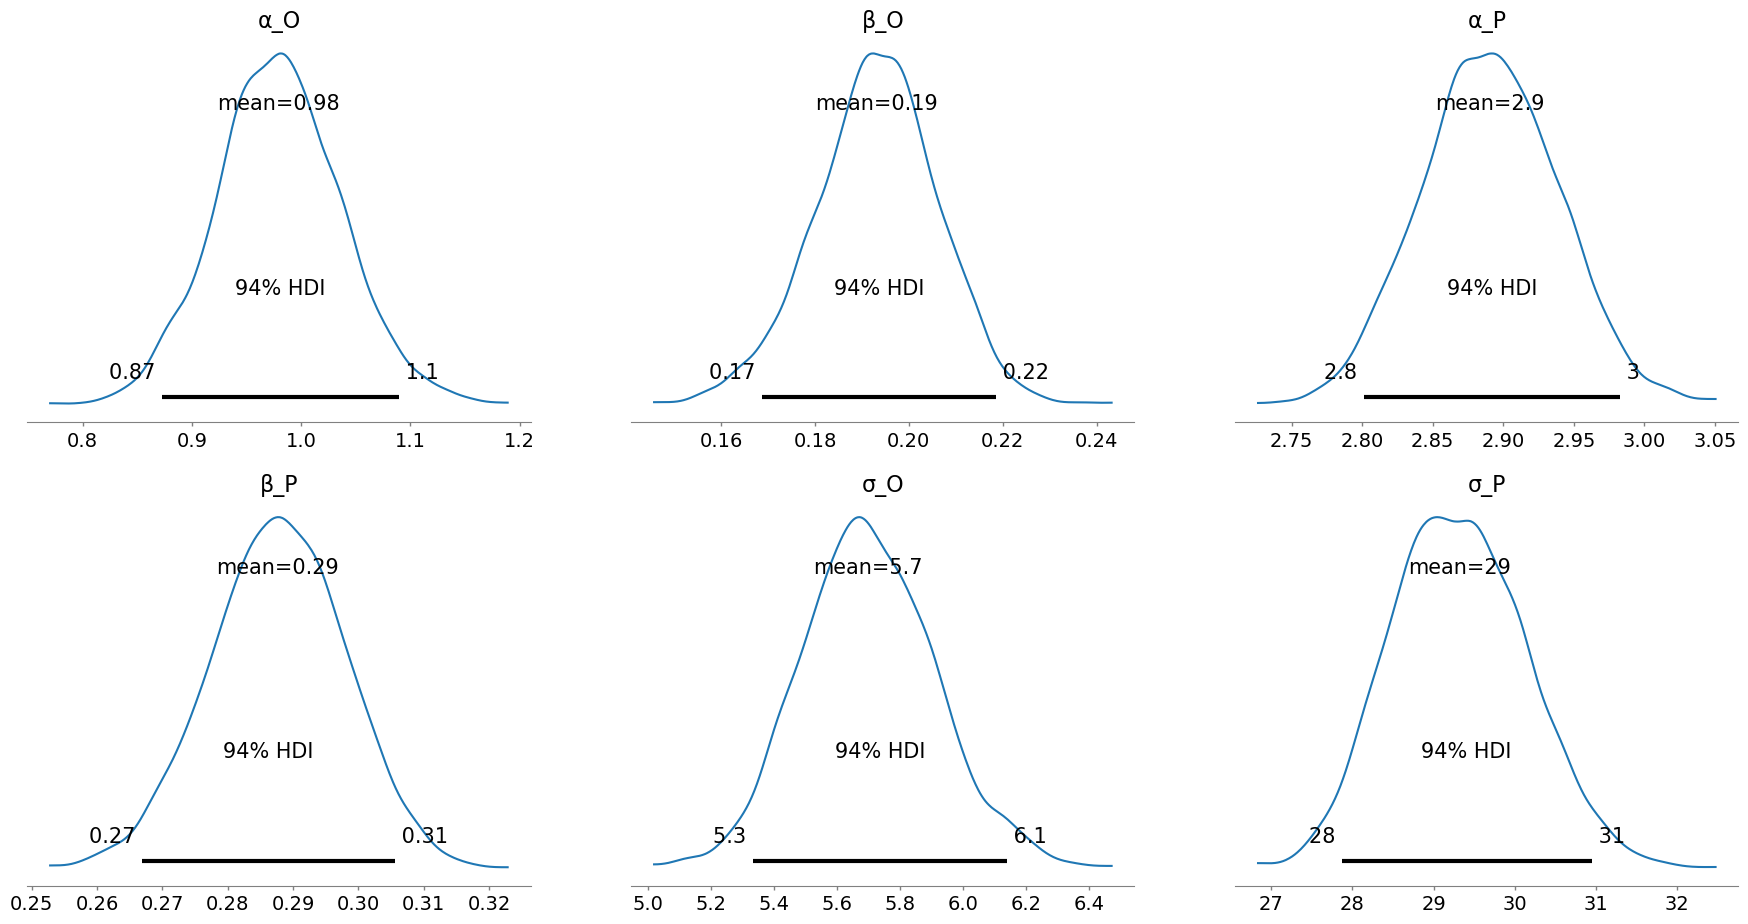

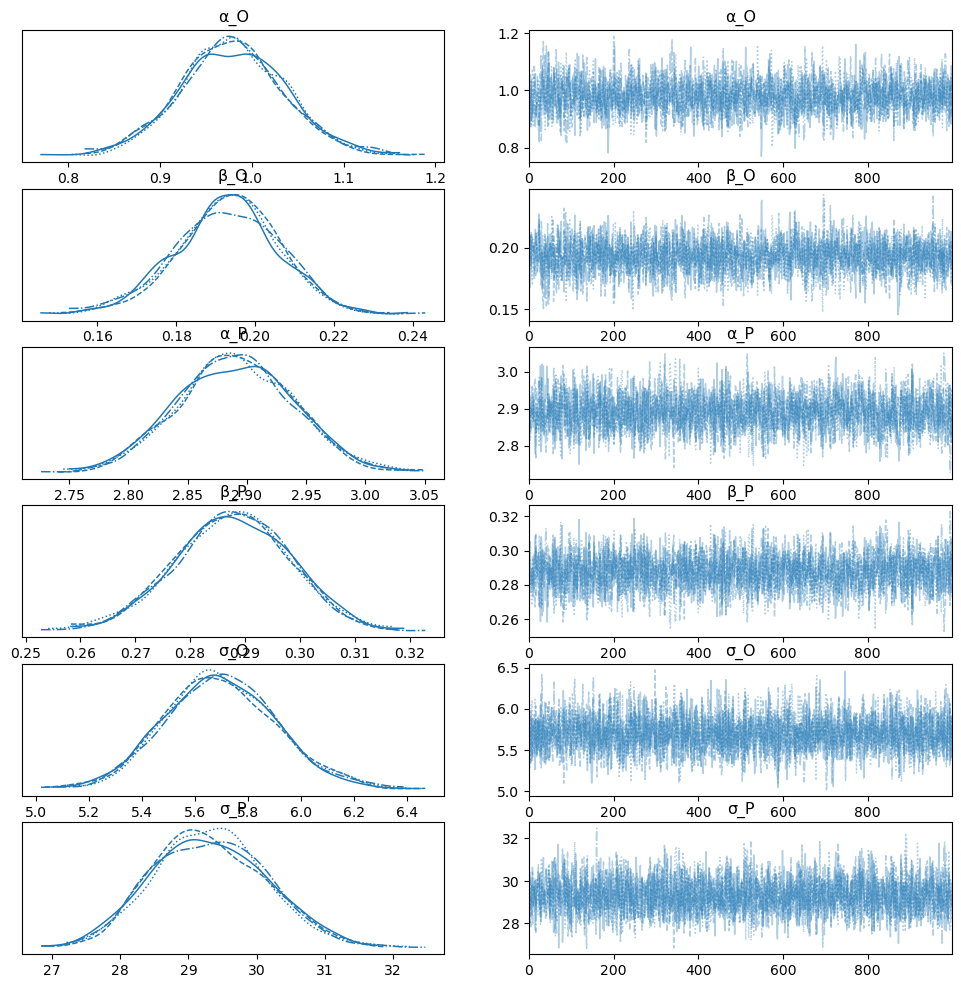

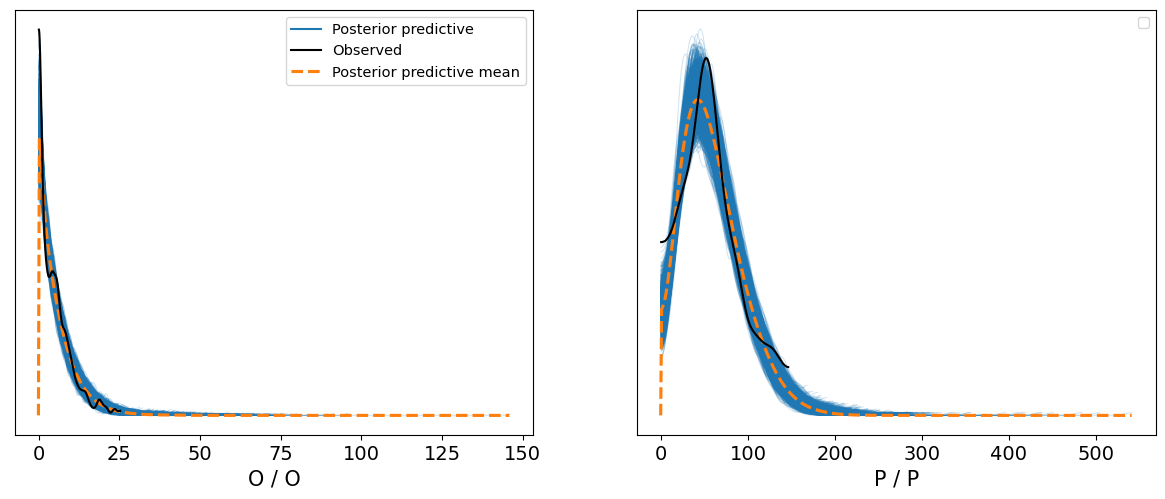

In [29]:
az.plot_posterior(posterior_1)
az.plot_trace(posterior_1)
# az.plot_forest(posterior_1, combined=False, hdi_prob=0.94)

az.plot_ppc(posterior_prediction_1)

In [30]:
# with pm.Model() as model_2:
#     F = pm.MutableData('F', data.is_old)

    # μ_β_W = np.array([0, 0])
    # σ_β_W = np.array(np.diagflat([1, 1]))
    # β_W = pm.MvNormal('β_W', μ_β_W, σ_β_W, shape=2)
    # σ_W = pm.HalfNormal('σ_W', 1)
    # W = pm.Normal('W', β_W[0] + β_W[1] * F, σ_W, observed=data.income_per_capita_ln)

    # μ_β_O = np.array([0, 0, 0])
    # σ_β_O = np.array(np.diagflat([0.1, 0.1, 0.1]))

    # μ_β_P = np.array([0, 0, 0])
    # σ_β_P = np.array(np.diagflat([0.1, 0.1, 0.1]))

    # β_O = pm.MvNormal('β_O', μ_β_O, σ_β_O, shape=3)
    # β_P = pm.MvNormal('β_P', μ_β_P, σ_β_P, shape=3)
    # σ_O = pm.HalfNormal('σ_O', 1)
    # σ_P = pm.HalfNormal('σ_P', 1)

    # P = pm.Normal('P', β_P[0] + β_P[1] * F + β_P[2] * W, σ_P, observed=data.population_ln)

    # μ_O = β_O[0] + β_O[1] * F + β_O[2] * W
    # O = pm.Normal('O', μ_O, σ_O, observed=data.orthodox_proportion_ln)

    # prior_2 = pm.sample_prior_predictive()
    # posterior_2 = pm.sample(init="adapt_diag", return_inferencedata=True)
    # posterior_prediction_2 = pm.sample_posterior_predictive(posterior_2)

# graph_2 = pm.model_to_graphviz(model_2)
# graph_2

In [31]:
# az.plot_posterior(posterior_2)
# az.plot_trace(posterior_2)
# az.plot_forest(posterior_2, combined=False, hdi_prob=0.94)

# az.plot_ppc(posterior_prediction_2)

<AxesSubplot:>

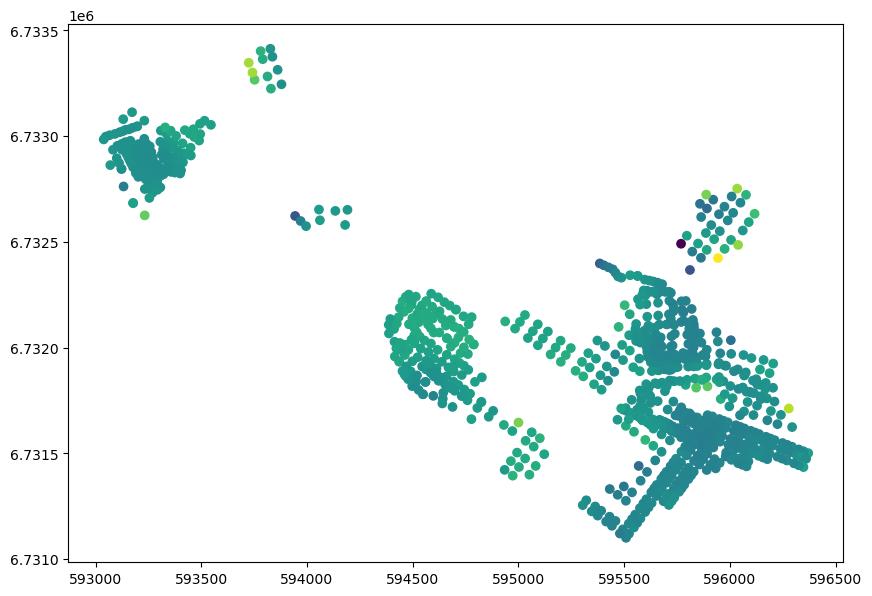

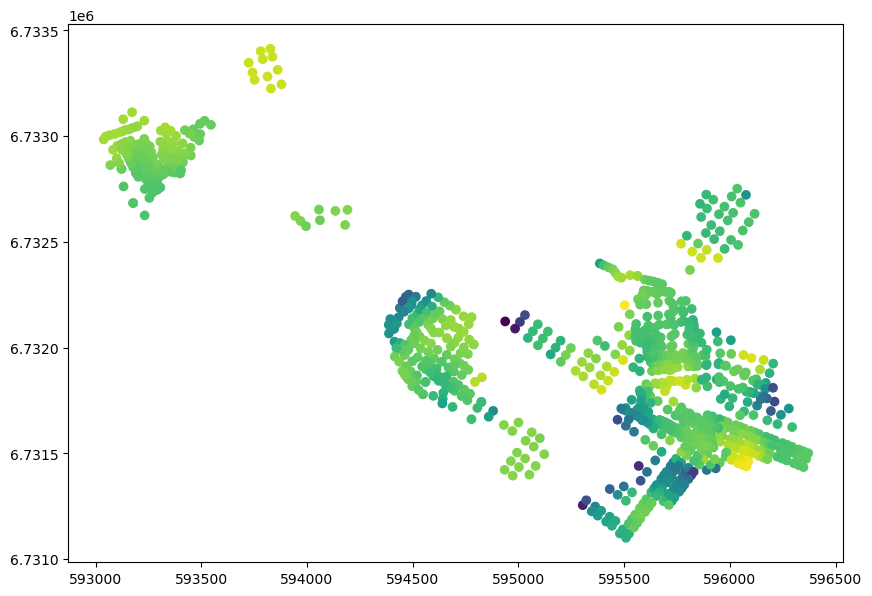

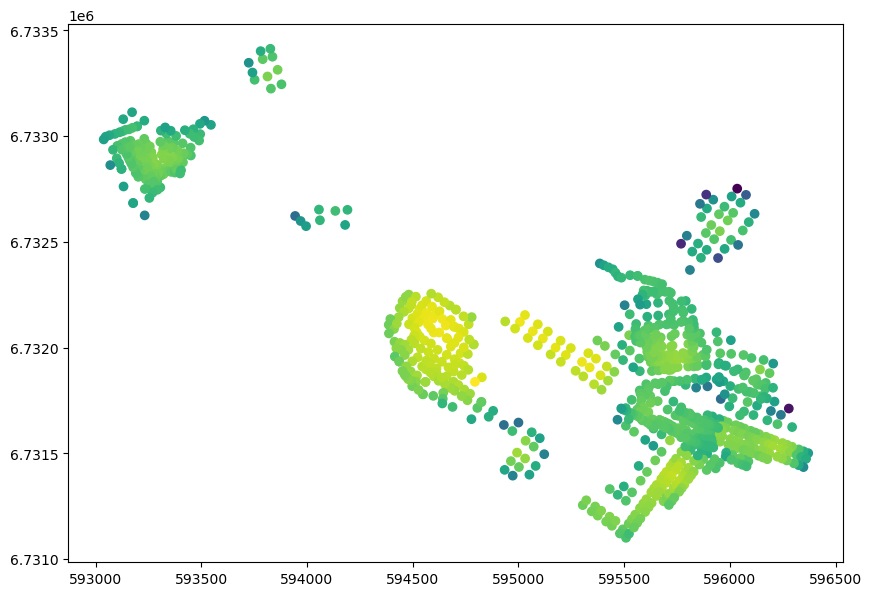

In [32]:
# Residuals

data['W_residual'] = data.income_per_capita_ln - 0.31 * data.is_old
data.plot(column='W_residual', figsize=(10, 10))

data['O_residual'] = data.orthodox_proportion_ln - (-3.4 + 0.94 * data.is_old)
data.plot(column='O_residual', figsize=(10, 10))

data['P_residual'] = data.population_ln - (3.1 + data.is_old - 0.49 * data.income_per_capita_ln)
data.plot(column='P_residual', figsize=(10, 10))

In [33]:
# with pm.Model() as model_3:
#     F = pm.MutableData('F', data.is_old.astype('int'))
#     idx = data.index.values
#
#     η = pm.Exponential('η_W', 0.5)
#     ρ = pm.Exponential('ρ_W', 0.5)
#     K = η * pm.gp.cov.ExpQuad(1, ls=ρ)
#
#     μ_β_W = np.array([0, 0])
#     σ_β_W = np.array(np.diagflat([1, 1]))
#     β_W = pm.MvNormal('β_W', μ_β_W, σ_β_W, shape=2)
#
#     σ_W = pm.Exponential('σ_W', 0.1)
#     σ_O = pm.Exponential('σ_O', 0.1)
#     σ_P = pm.Exponential('σ_P', 0.1)
#
#     ε_W = pm.gp.Latent(cov_func=K).prior('ε_W', X=d_norm)
#     W = pm.Normal('W', β_W[0] + β_W[1] * F + ε_W[idx], σ_W, observed=data.income_per_capita_ln)
#
#     μ_β_O = np.array([0, 0, 0])
#     σ_β_O = np.array(np.diagflat([0.1, 0.1, 0.1]))
#
#     μ_β_P = np.array([0., 0., 0.])
#     σ_β_P = np.array(np.diagflat([0.1, 0.1, 0.1]))
#
#     β_O = pm.MvNormal('β_O', μ_β_O, σ_β_O, shape=3)
#     β_P = pm.MvNormal('β_P', μ_β_P, σ_β_P, shape=3)
#
#     ε_O = pm.gp.Latent(cov_func=K).prior('ε_O', X=d_norm)
#     O = pm.Normal('O', β_O[0] + β_O[1] * F + β_O[2] * W + ε_O[idx], σ_O, observed=data.orthodox_proportion_ln)
#
#     ε_P = pm.gp.Latent(cov_func=K).prior('ε_P', X=d_norm)
#     P = pm.Normal('P', β_P[0] + β_P[1] * F + β_P[2] * W + ε_P[idx], σ_P, observed=data.population_ln)
#
#     prior_3 = pm.sample_prior_predictive()
#     posterior_3 = pm.sample(draws=500, tune=100, init="adapt_diag", return_inferencedata=True, target_accept=0.9)
#     posterior_prediction_3 = pm.sample_posterior_predictive(posterior_3)
#
# graph_3 = pm.model_to_graphviz(model_3)
# graph_3

In [34]:
# az.plot_posterior(posterior_3)
# az.plot_trace(posterior_3)
# az.plot_forest(posterior_3, combined=False, hdi_prob=0.94)

# az.plot_ppc(posterior_prediction_3)

In [35]:
with pm.Model() as model_2:
    W = pm.MutableData('W', data.total_income_ln)
    idx = data.is_old

    η_O = pm.Normal('η_O', 1.5, 1)
    θ_O = pm.Normal('θ_O', 0, 0.1)
    η_P = pm.Normal('η_P', 4, 1)
    θ_P = pm.Normal('θ_P', 0, 0.1)

    σ_α_O = np.array([0.1, 0.1])
    σ_β_O = np.array([0.1, 0.1])
    α_O = pm.Normal('α_O', η_O, σ_α_O, shape=2)
    β_O = pm.Normal('β_O', θ_O, σ_β_O, shape=2)
    σ_O = pm.Gamma('σ_O', 2, 2)
    O = pm.Gamma('O', mu=pm.math.exp(α_O[idx] + β_O[idx] * W), sigma=σ_O, observed=data.orthodox)

    σ_α_P = np.array([0.1, 0.1])
    σ_β_P = np.array([0.1, 0.1])
    α_P = pm.Normal('α_P', η_P, σ_α_P, shape=2)
    β_P = pm.Normal('β_P', θ_P, σ_β_P, shape=2)
    σ_P = pm.Gamma('σ_P', 10, 2)
    P = pm.Gamma('P', mu=pm.math.exp(α_P[idx] + β_P[idx] * W), sigma=σ_P, observed=data.population)

    prior_2 = pm.sample_prior_predictive()
    posterior_2 = pm.sample(draws=1000, tune=1000, init="adapt_diag", return_inferencedata=True, target_accept=0.9)
    posterior_prediction_2 = pm.sample_posterior_predictive(posterior_2)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [η_O, θ_O, η_P, θ_P, α_O, β_O, σ_O, α_P, β_P, σ_P]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 188 seconds.


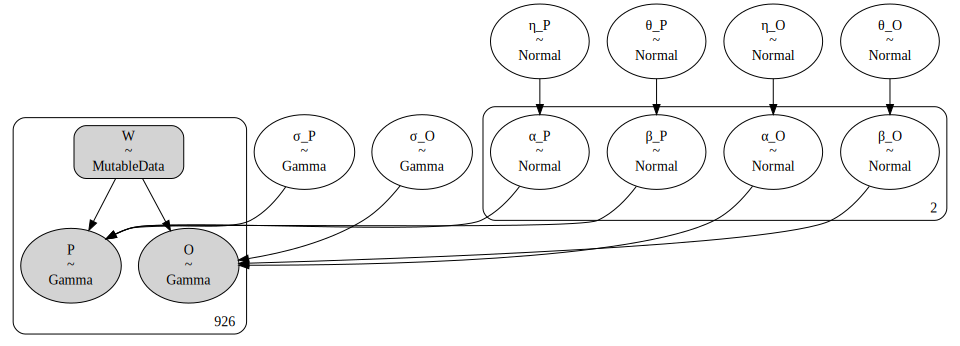

In [36]:
graph_2 = pm.model_to_graphviz(model_2)
graph_2

array([<AxesSubplot:xlabel='O / O'>, <AxesSubplot:xlabel='P / P'>],
      dtype=object)

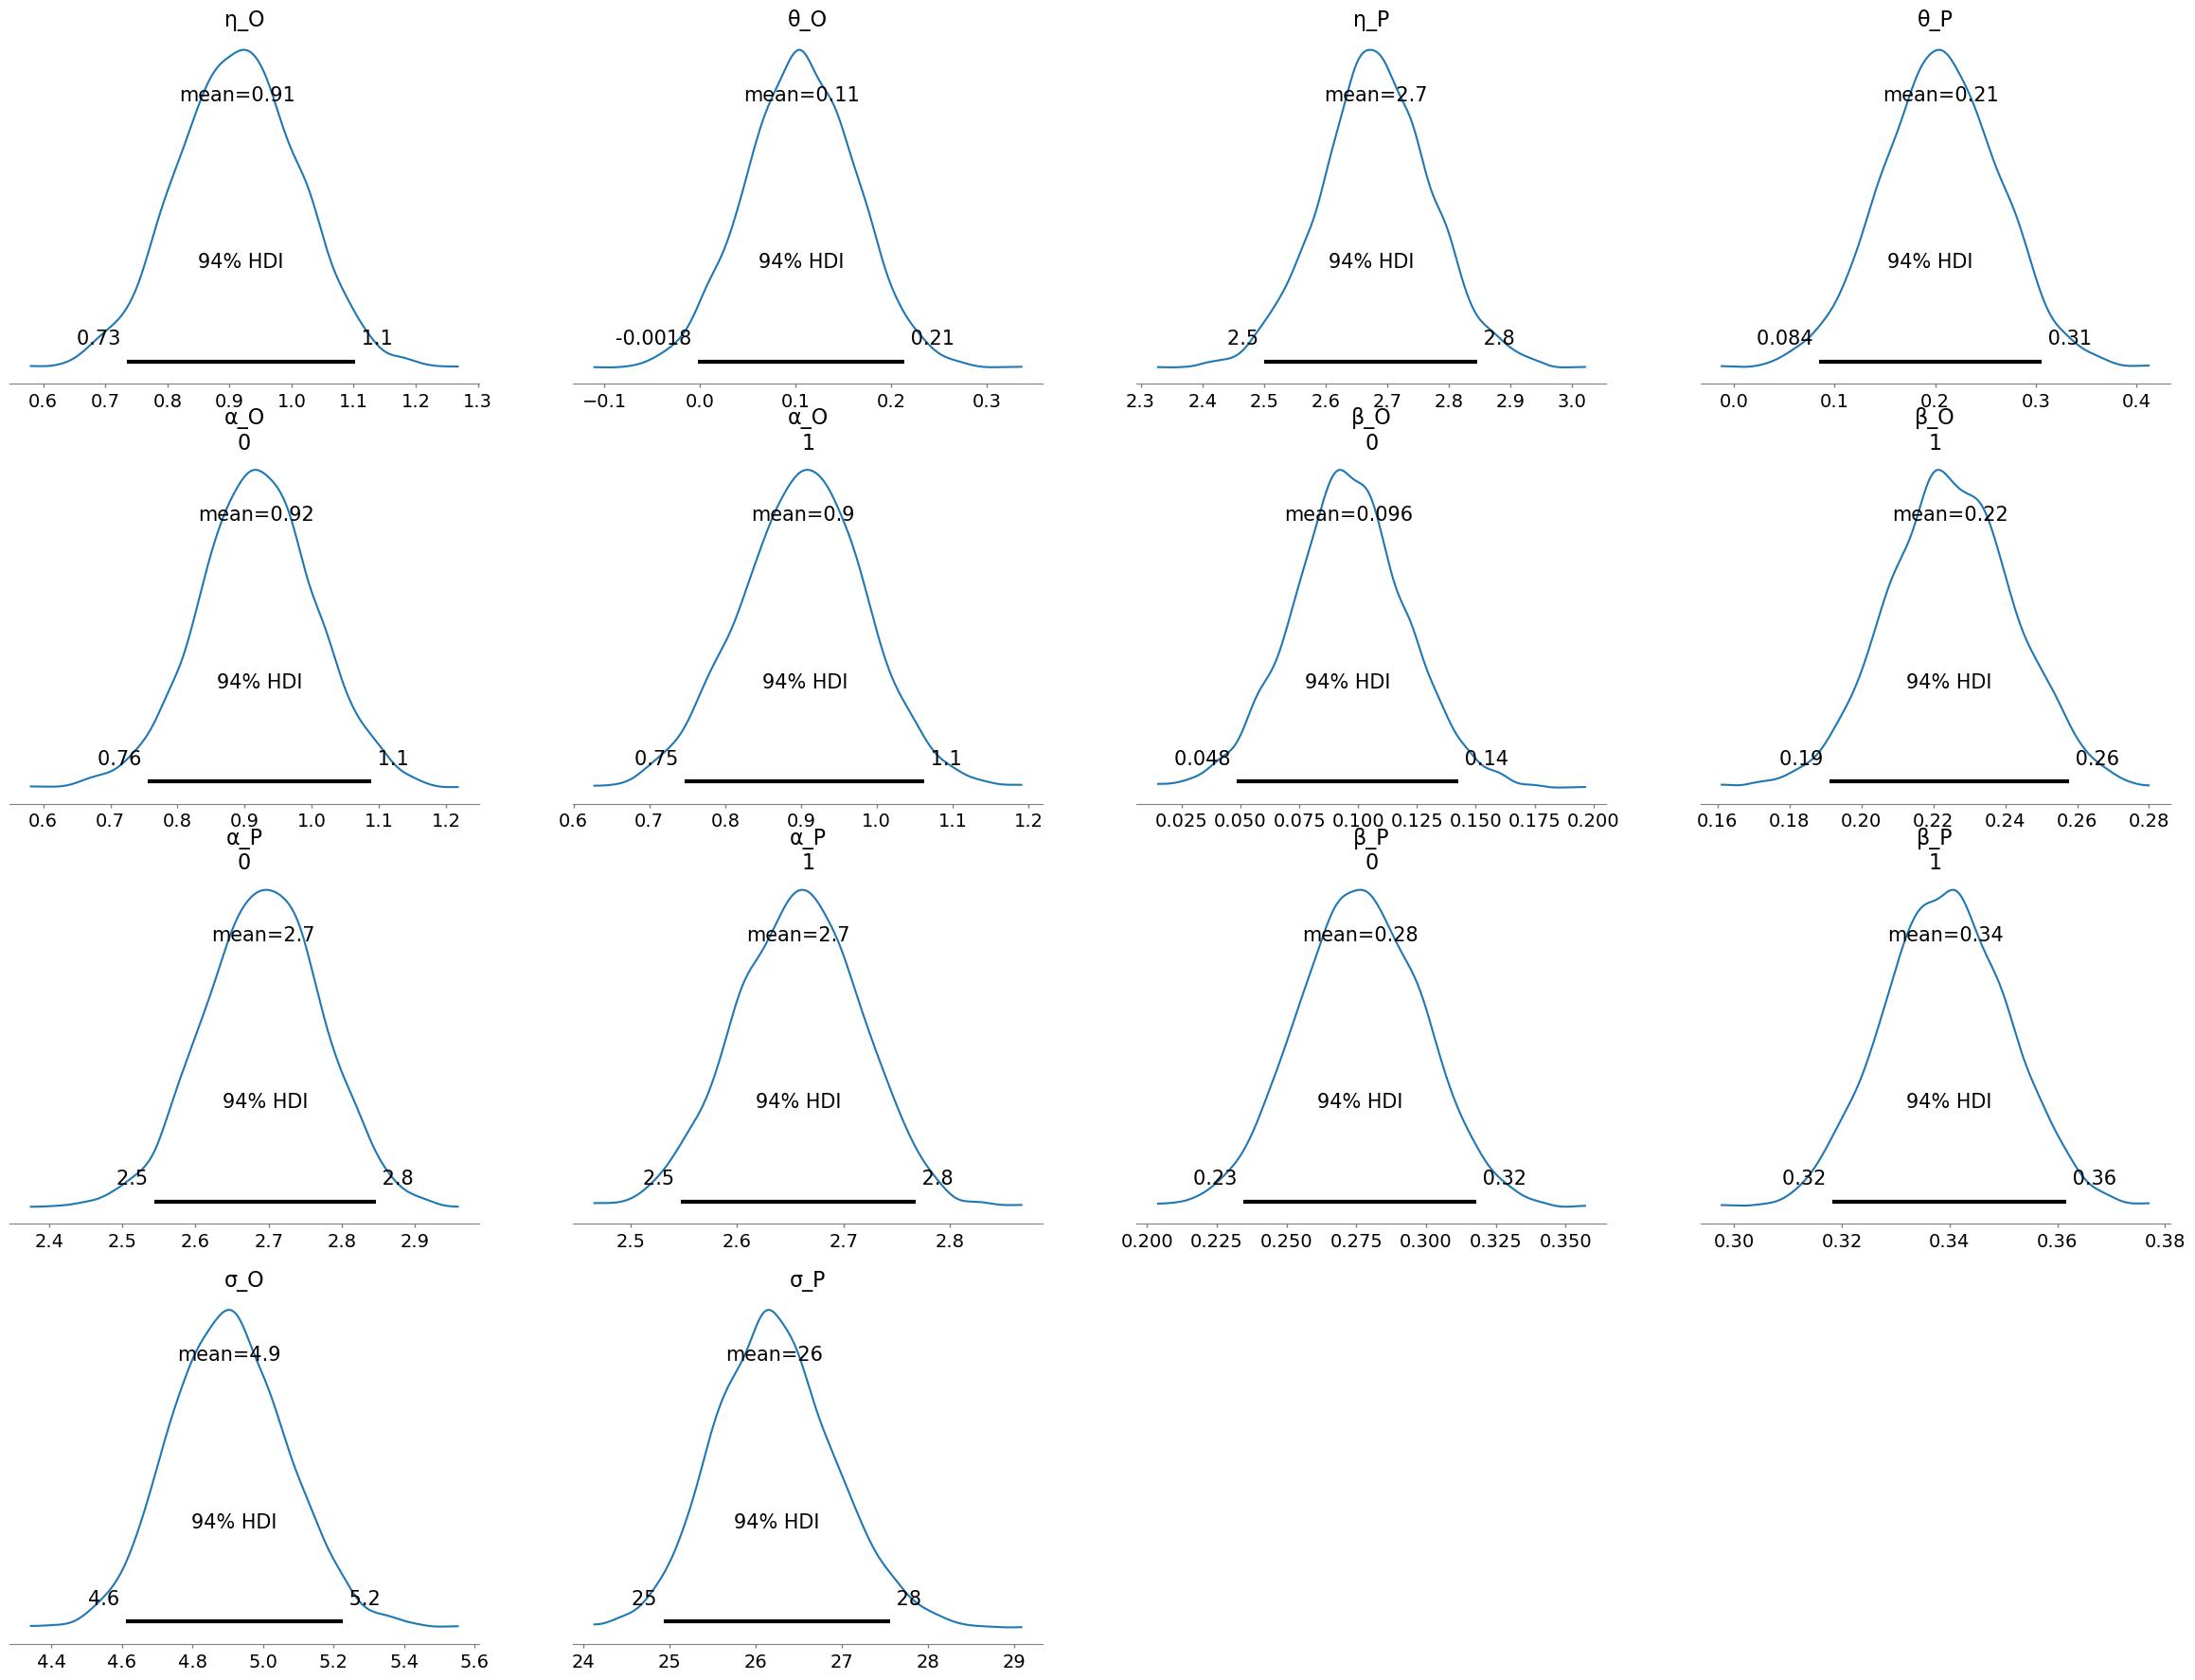

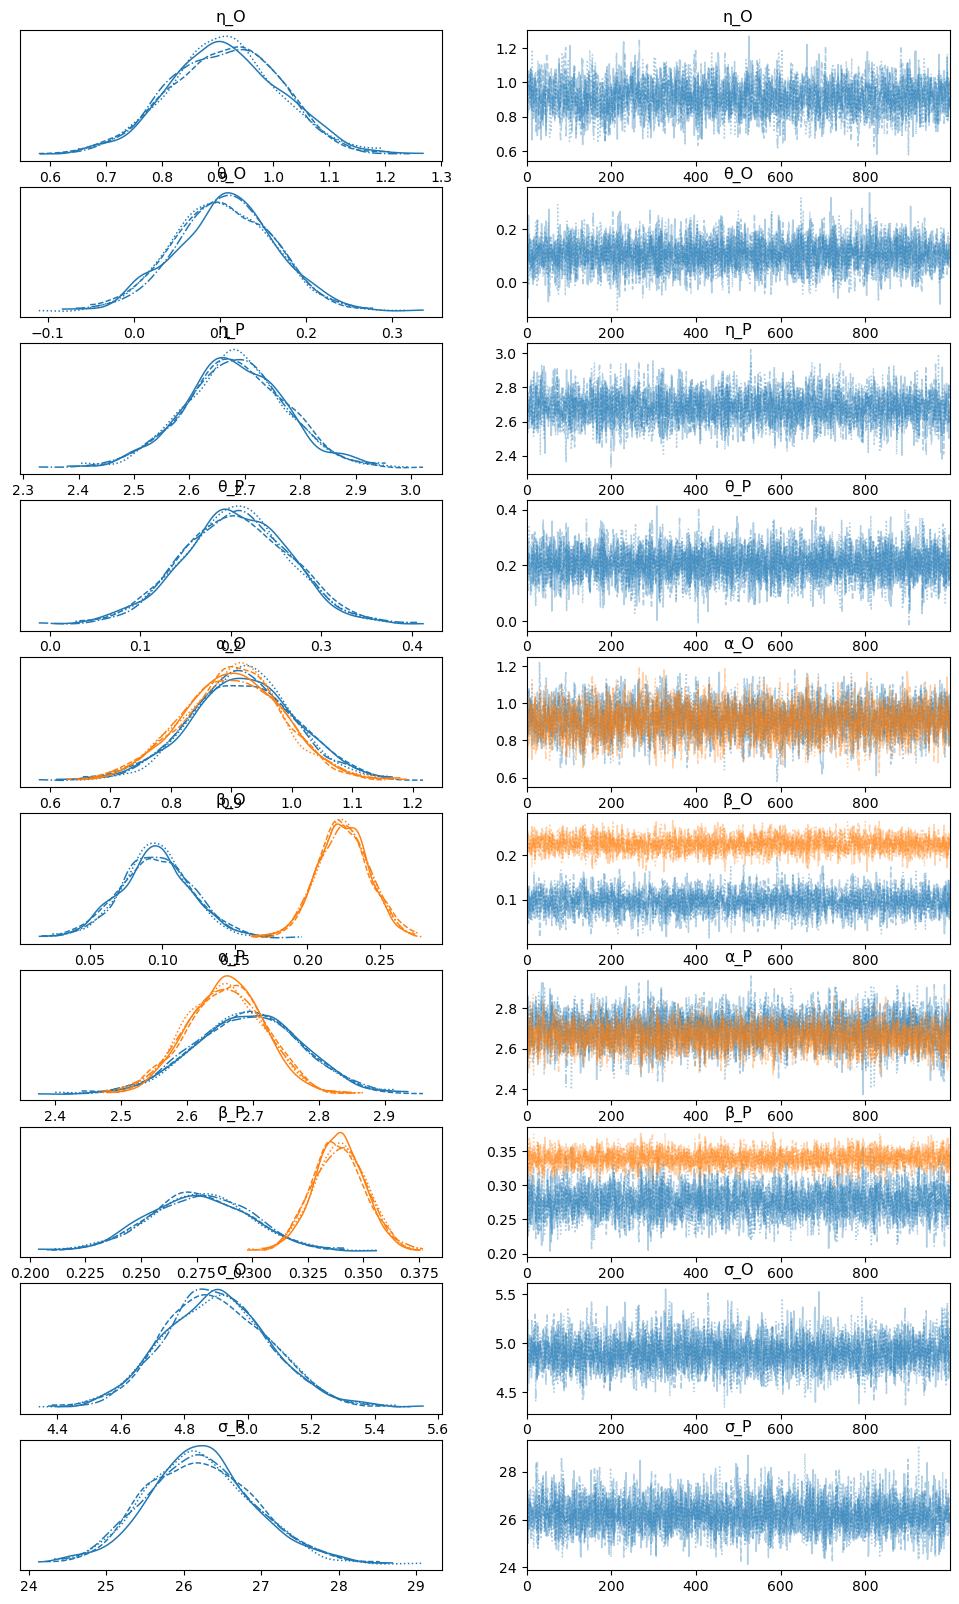

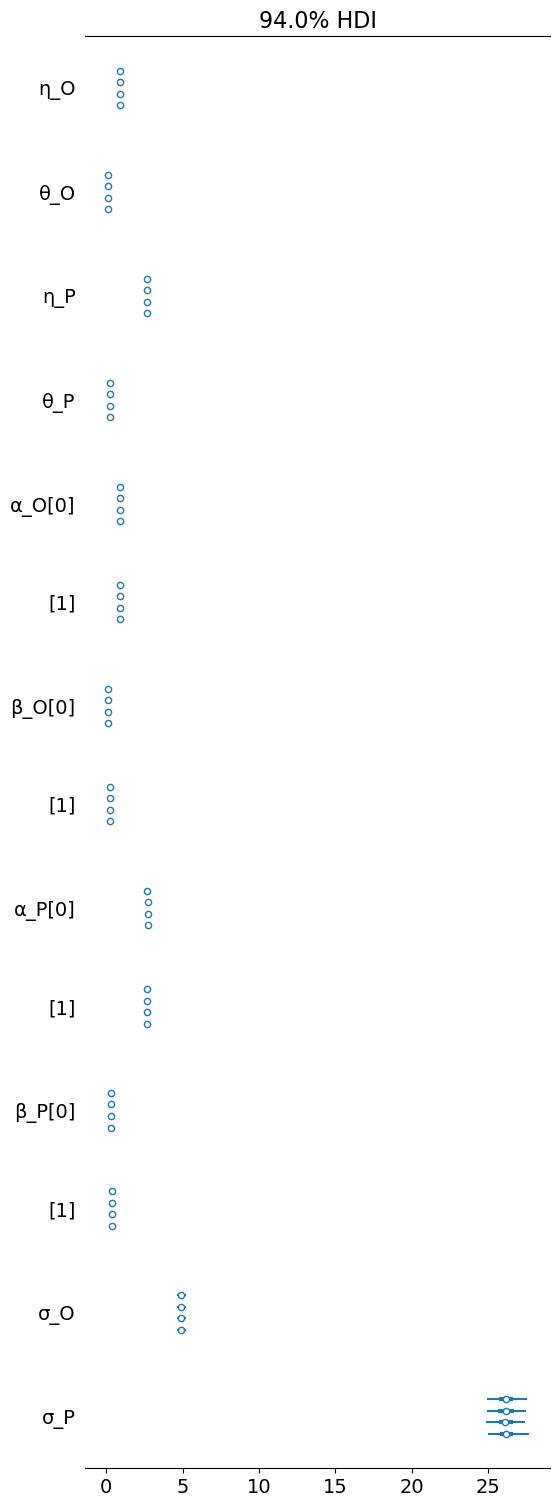

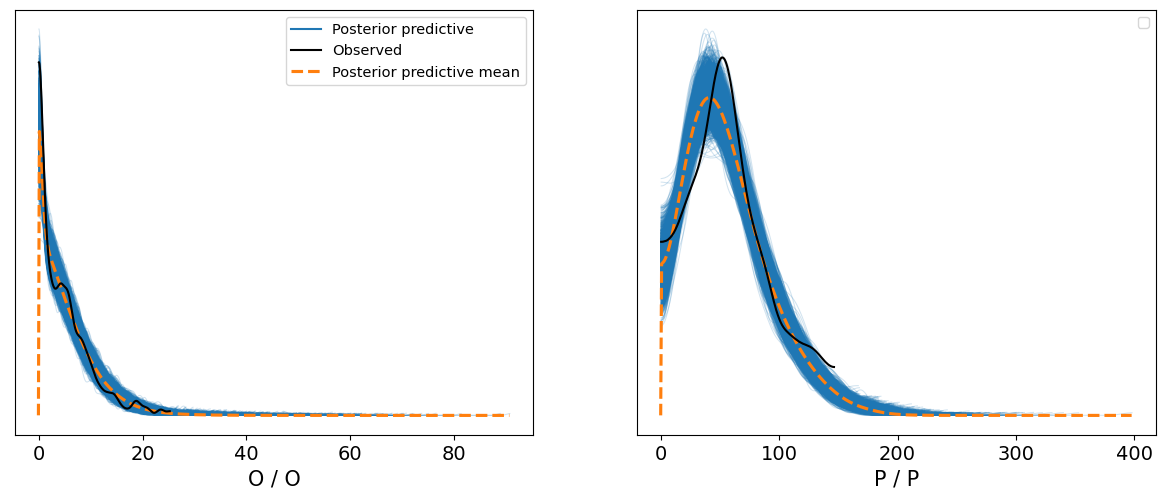

In [37]:
az.plot_posterior(posterior_2)
az.plot_trace(posterior_2)
az.plot_forest(posterior_2, combined=False, hdi_prob=0.94)

az.plot_ppc(posterior_prediction_2)

In [38]:
with pm.Model() as model_3:
    idx = data.is_old

    η_O = pm.Normal('η_O', 1.5, 1)
    η_P = pm.Normal('η_P', 4, 1)

    σ_α_O = np.array([0.1, 0.1])
    α_O = pm.Normal('α_O', η_O, σ_α_O, shape=2)
    σ_O = pm.Gamma('σ_O', 2, 2)
    O = pm.Gamma('O', mu=pm.math.exp(α_O[idx]), sigma=σ_O, observed=data.orthodox)

    σ_α_P = np.array([0.1, 0.1])
    α_P = pm.Normal('α_P', η_P, σ_α_P, shape=2)
    σ_P = pm.Gamma('σ_P', 10, 2)
    P = pm.Gamma('P', mu=pm.math.exp(α_P[idx]), sigma=σ_P, observed=data.population)

    prior_3 = pm.sample_prior_predictive()
    posterior_3 = pm.sample(draws=1000, tune=1000, init="adapt_diag", return_inferencedata=True, target_accept=0.9)
    posterior_prediction_3 = pm.sample_posterior_predictive(posterior_3)

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [η_O, η_P, α_O, σ_O, α_P, σ_P]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.


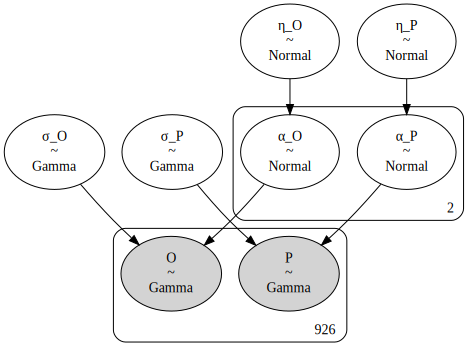

In [39]:
graph_3 = pm.model_to_graphviz(model_3)
graph_3

array([<AxesSubplot:xlabel='O / O'>, <AxesSubplot:xlabel='P / P'>],
      dtype=object)

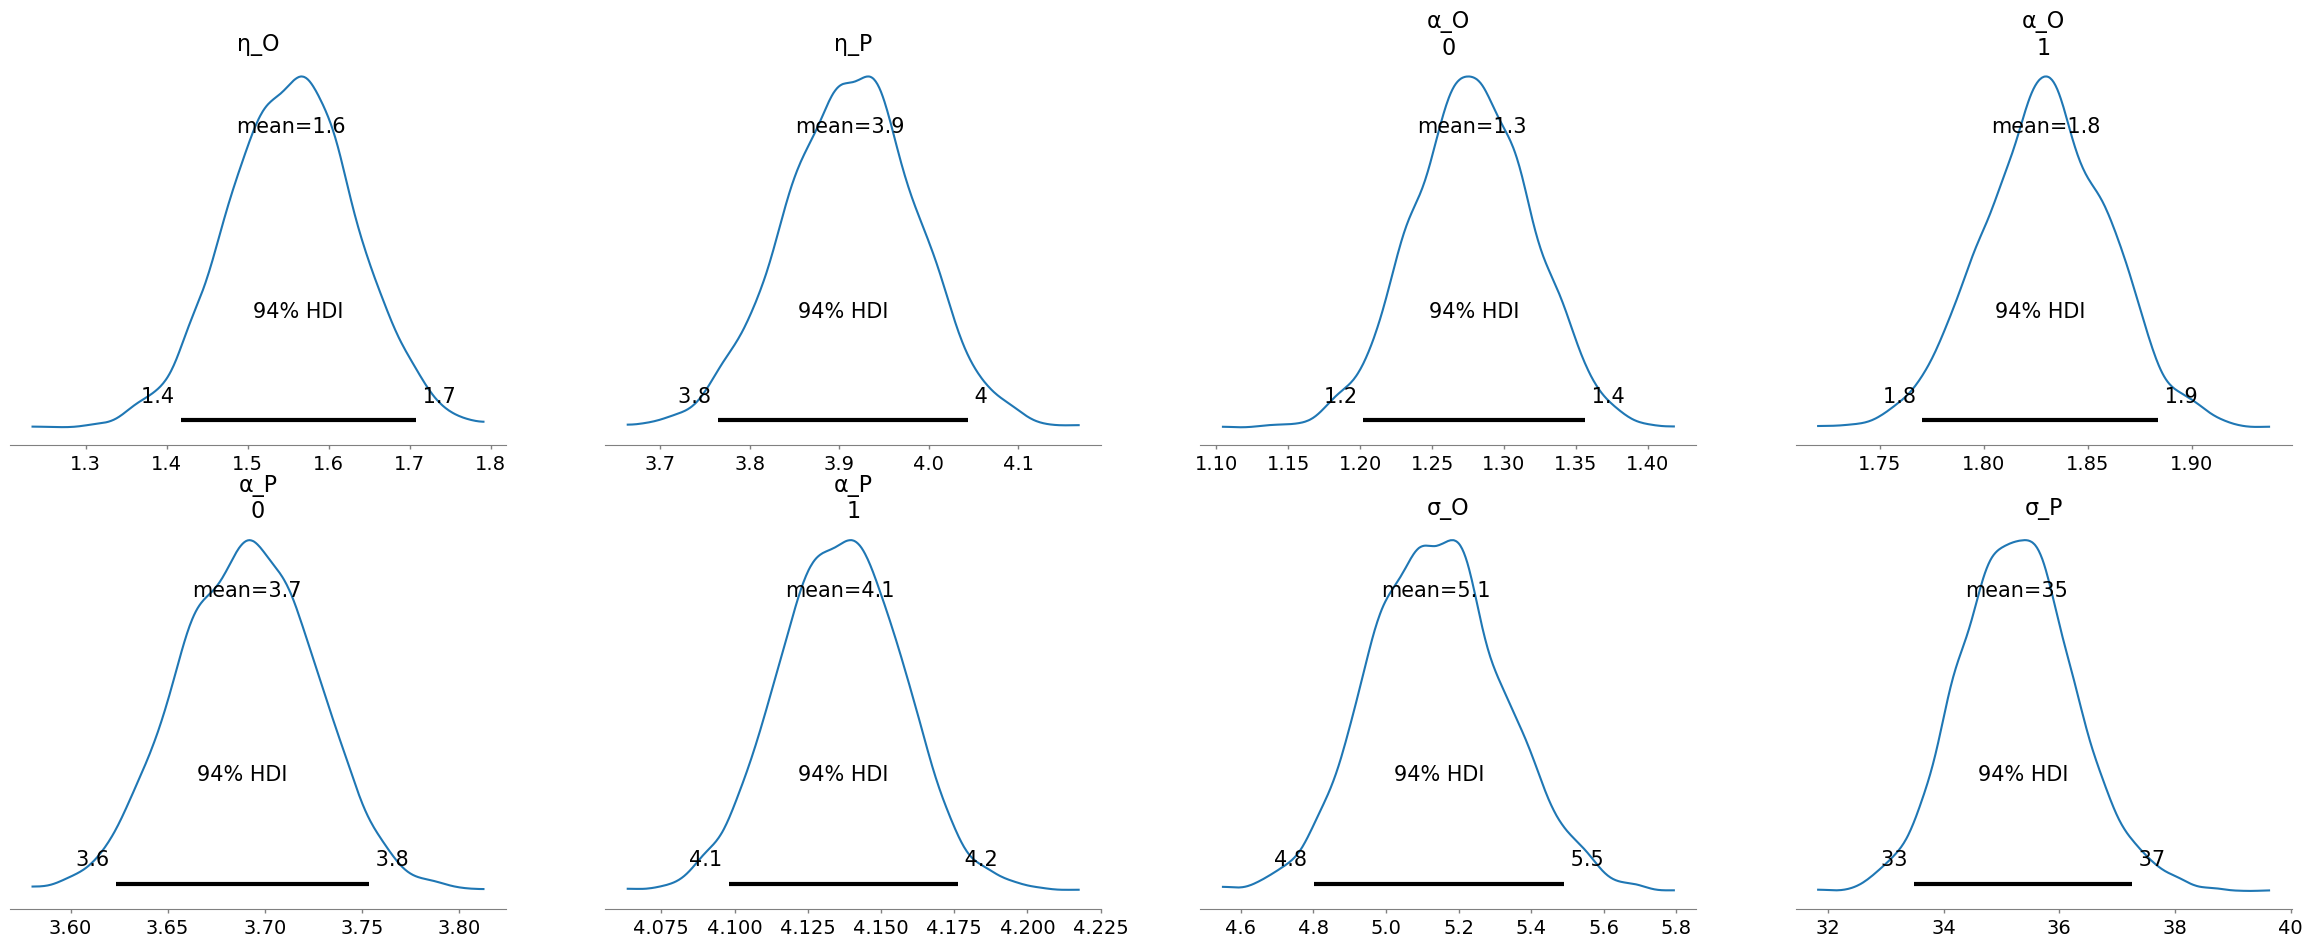

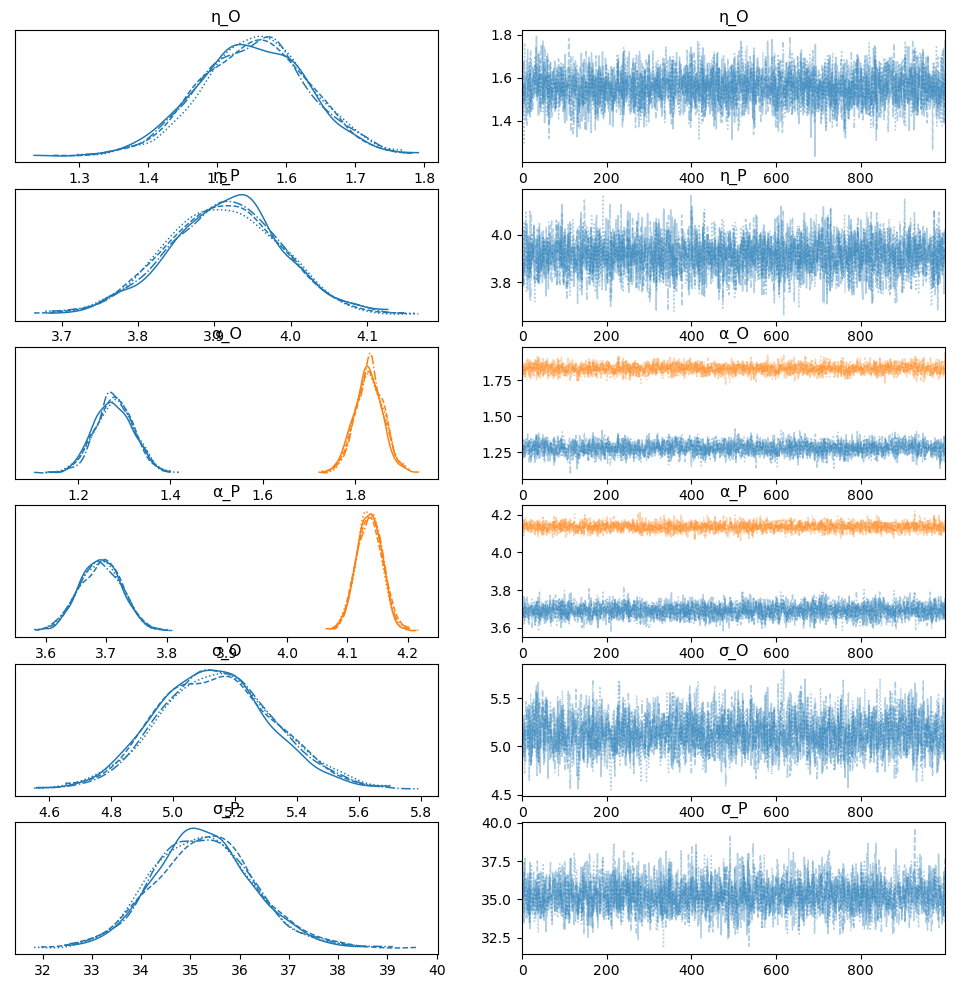

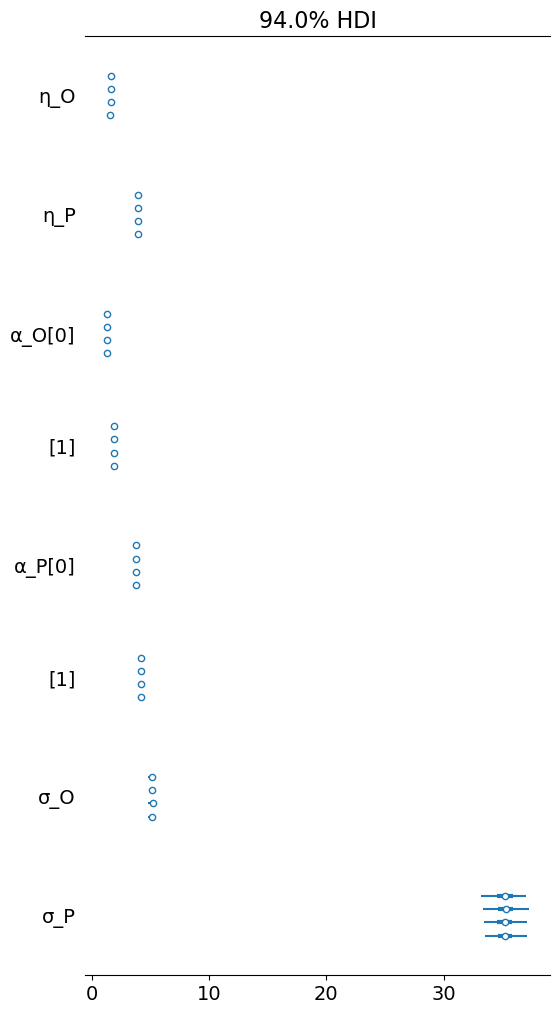

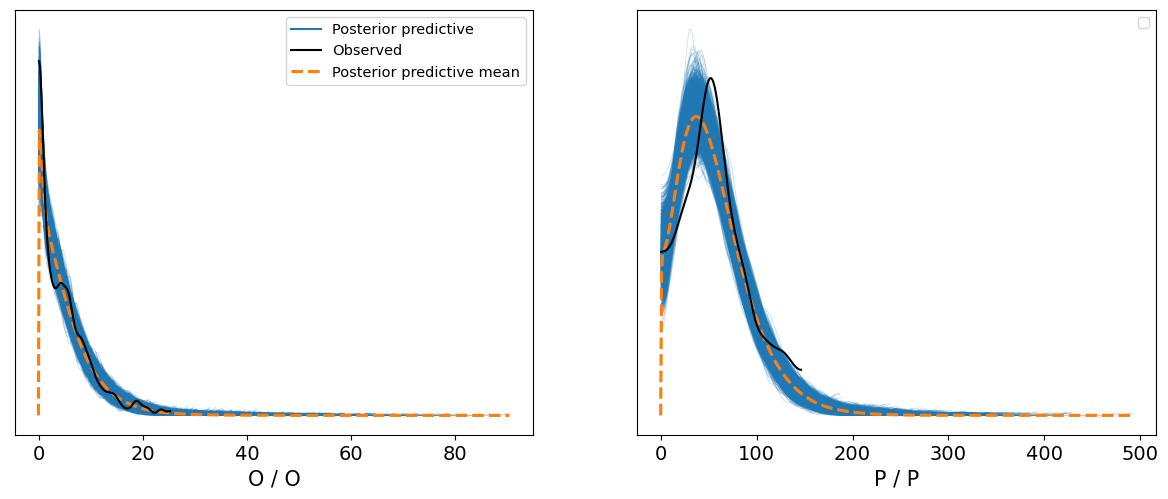

In [40]:
az.plot_posterior(posterior_3)
az.plot_trace(posterior_3)
az.plot_forest(posterior_3, combined=False, hdi_prob=0.94)

az.plot_ppc(posterior_prediction_3)